# 用卷积神经网络处理序列
### Step 1：实现一维卷积神经网络

In [1]:
# 准备IMDB数据，进行情感分类

from keras.datasets import imdb
from keras_preprocessing import sequence

max_features = 10000
max_len = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [2]:
# 在IMDB 数据上训练并评估一个简单的一维卷积神经网络

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 3

In [3]:
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

D:\Anaconda1\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
157/157 [==============================] - 54s 333ms/step - loss: 0.9392 - acc: 0.5044 - val_loss: 0.6885 - val_acc: 0.5478
Epoch 2/10
157/157 [==============================] - 48s 305ms/step - loss: 0.6756 - acc: 0.6321 - val_loss: 0.6733 - val_acc: 0.6236
Epoch 3/10
157/157 [==============================] - 43s 277ms/step - loss: 0.6429 - acc: 0.7463 - val_loss: 0.6438 - val_acc: 0.6918
Epoch 4/10
157/157 [==============================] - 42s 266ms/step - loss: 0.5866 - acc: 0.8037 - val_loss: 0.5687 - val_acc: 0.7858
Epoch 5/10
157/157 [==============================] - 42s 264ms/step - loss: 0.4763 - acc: 0.8354 - val_loss: 0.4478 - val_acc: 0.8232
Epoch 6/10
157/157 [==============================] - 41s 260ms/step - loss: 0.3694 - acc: 0.8647 - val_loss: 0.4062 - val_acc: 0.8464
Epoch 7/10
157/157 [==============================] - 43s 275ms/step - loss: 0.3188 - acc: 0.8881 - val_loss: 0.4092 - val_acc: 0.8568
Epoch 8/10
157/157 [==============================] - 4

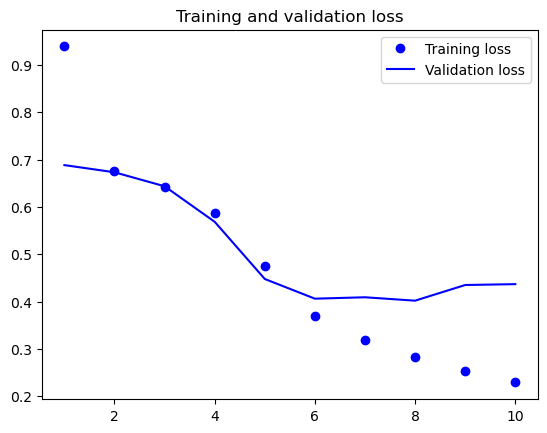

In [4]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

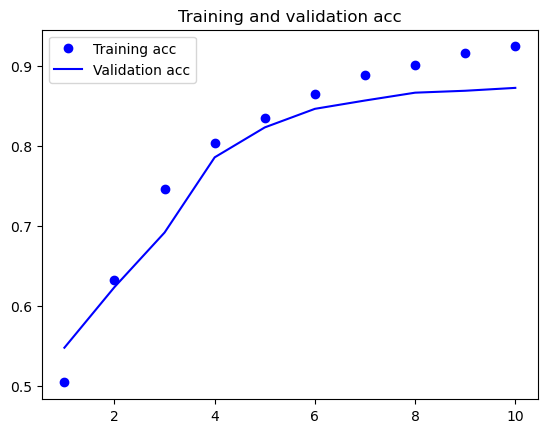

In [5]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.show()

In [6]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 44s 278ms/step - loss: 0.2079 - acc: 0.9337 - val_loss: 0.4648 - val_acc: 0.8748
Epoch 2/5
157/157 [==============================] - 43s 276ms/step - loss: 0.1899 - acc: 0.9413 - val_loss: 0.4776 - val_acc: 0.8746
Epoch 3/5
157/157 [==============================] - 48s 303ms/step - loss: 0.1739 - acc: 0.9480 - val_loss: 0.5272 - val_acc: 0.8732
Epoch 4/5
157/157 [==============================] - 47s 300ms/step - loss: 0.1588 - acc: 0.9556 - val_loss: 0.5413 - val_acc: 0.8752
Epoch 5/5
157/157 [==============================] - 50s 315ms/step - loss: 0.1442 - acc: 0.9621 - val_loss: 0.5913 - val_acc: 0.8734


In [8]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 8s 10ms/step - loss: 0.6100 - acc: 0.8601


[0.6099628806114197, 0.8601199984550476]

### Step 2：结合CNN和RNN来处理长序列

In [10]:
# 处理数据，温度预测
import os
data_dir = "D://ML/jena_climate/"
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values
    
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay -1 
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),
                            lookback // step,
                            data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets
        
step = 3 
lookback = 720 
delay = 144

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step)

val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step)

test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step)

val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

In [11]:
# 结合一维卷积基和 GRU 层的模型
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, None, 32)          2272      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 32)         0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, None, 32)          5152      
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,793
Trainable params: 13,793
Non-trainable params: 0
__________________________________________________

In [12]:
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20


C:\Users\HP\AppData\Local\Temp\ipykernel_14816\939777277.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen,


500/500 [==============================] - 61s 116ms/step - loss: 6.5591 - val_loss: 4.3120
Epoch 2/20
500/500 [==============================] - 53s 107ms/step - loss: 4.0229 - val_loss: 3.6272
Epoch 3/20
500/500 [==============================] - 51s 101ms/step - loss: 3.6449 - val_loss: 3.5007
Epoch 4/20
500/500 [==============================] - 51s 102ms/step - loss: 3.3829 - val_loss: 3.9166
Epoch 5/20
500/500 [==============================] - 52s 103ms/step - loss: 3.2778 - val_loss: 2.9294
Epoch 6/20
500/500 [==============================] - 51s 102ms/step - loss: 3.2125 - val_loss: 2.9005
Epoch 7/20
500/500 [==============================] - 52s 104ms/step - loss: 3.1513 - val_loss: 2.8282
Epoch 8/20
500/500 [==============================] - 50s 101ms/step - loss: 3.1393 - val_loss: 3.3732
Epoch 9/20
500/500 [==============================] - 51s 102ms/step - loss: 3.0935 - val_loss: 3.4781
Epoch 10/20
500/500 [==============================] - 58s 117ms/step - loss: 3.0787

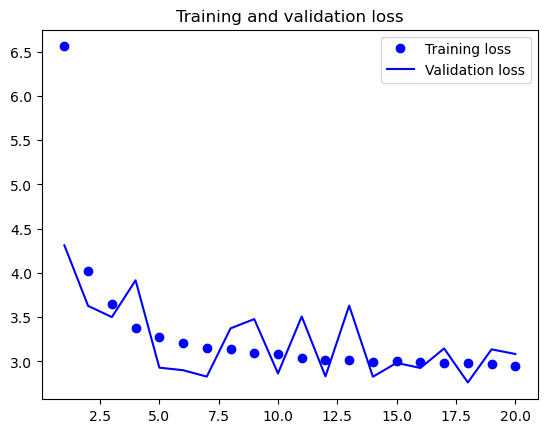

In [13]:
# 速度快很多

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()